In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

1.	Tải dữ liệu diemthidaihoc.csv và hiển thị các dòng dữ liệu

In [31]:
df = pd.read_csv('dulieuxettuyendaihoc.csv')

pd.concat([df.head(), df.tail()])

#CHECK FOR NULL VALUES
df.isnull().any()

df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [32]:
#Đổi tên
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC'}, inplace=True)

In [33]:
df=df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT', 'LOGIC']]
df.head(5)

,T1,T2,T3,T4,T5,T6,GT,LOGIC
0,7.2,8.4,7.4,7.2,7.4,6.9,F,3.25
1,5.4,6.3,4.3,4.9,3.0,4.0,M,4.00
2,5.6,5.0,2.8,6.1,4.8,5.7,M,6.75
3,6.6,5.1,5.9,4.1,6.1,7.4,M,4.25
4,6.0,5.4,7.6,4.4,6.8,8.0,M,4.50


In [34]:
GT= pd.get_dummies(df['GT']).astype(int)
df.drop('GT',axis=1,inplace=True)
df= pd.concat([df,GT],axis=1)
df.head(5)

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_7348\2883349977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('GT',axis=1,inplace=True)


,T1,T2,T3,T4,T5,T6,LOGIC,F,M
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,4.00,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,6.75,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,4.50,0,1


In [35]:
X = df.iloc[:,[0,1,2,3,4,5,7,8]] 
X.head()

,T1,T2,T3,T4,T5,T6,F,M
0,7.2,8.4,7.4,7.2,7.4,6.9,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,0,1


In [36]:
y = df.iloc[:, 6] 
y.head(5)

0    3.25
1    4.00
2    6.75
3    4.25
4    4.50
Name: LOGIC, dtype: float64

2.	Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét

In [37]:
# Hiển thị thông tin cơ bản về dữ liệu

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      100 non-null    float64
 1   T2      100 non-null    float64
 2   T3      100 non-null    float64
 3   T4      100 non-null    float64
 4   T5      100 non-null    float64
 5   T6      100 non-null    float64
 6   LOGIC   100 non-null    float64
 7   F       100 non-null    int32  
 8   M       100 non-null    int32  
dtypes: float64(7), int32(2)
memory usage: 6.4 KB
None


In [38]:
# Tính toán các độ đo thống kê cơ bản

print(df.describe())

               T1          T2          T3          T4          T5        T6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.0000   
mean     5.946000    6.374000    6.383000    6.291000    6.717000    6.9370   
std      1.608338    1.561443    1.574484    1.469563    1.478059    1.3632   
min      2.400000    2.800000    2.300000    2.900000    3.000000    3.7000   
25%      5.000000    5.300000    5.175000    5.300000    5.800000    6.0000   
50%      5.850000    6.250000    6.650000    6.350000    6.800000    7.1000   
75%      7.200000    7.525000    7.500000    7.600000    7.800000    8.0000   
max      9.300000    9.600000    9.500000    9.400000    9.500000    9.5000   

            LOGIC           F           M  
count  100.000000  100.000000  100.000000  
mean     4.255000    0.480000    0.520000  
std      1.060053    0.502117    0.502117  
min      1.500000    0.000000    0.000000  
25%      3.500000    0.000000    0.000000  
50%      4.125000    0.0

3.	Chia tập dữ liệu thành tập train và test với tỉ lệ 80:20 và random state là 16

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 8)
(20, 8)
(80,)
(20,)


4.	Tiến hành transform theo hàm x*x dữ liệu input đầu vào trên tập train

In [40]:
import numpy as np

X_train = np.square(X_train)

In [41]:
# Hiển thị dữ liệu sau khi tiến hành transform
print(X_train.head(5))

       T1     T2     T3     T4     T5     T6  F  M
96  13.69  16.81   9.61  11.56  30.25  32.49  1  0
5   86.49  92.16  50.41  72.25  72.25  60.84  0  1
90  65.61  77.44  84.64  77.44  79.21  72.25  0  1
53  24.01  37.21   6.25  38.44  24.01  42.25  0  1
67  21.16  51.84  57.76  38.44  64.00  51.84  0  1


5.	Tiến hành EDA dữ liệu các điểm toán sau khi transform. Ví dụ: Hãy vẽ biểu đồ phân phối các điểm toán và cho nhận xét

array([[<Axes: title={'center': 'T1'}>, <Axes: title={'center': 'T2'}>],
       [<Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4'}>],
       [<Axes: title={'center': 'T5'}>, <Axes: title={'center': 'T6'}>]],
      dtype=object)

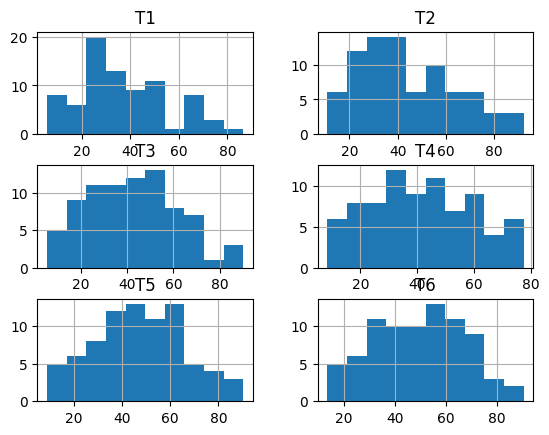

In [42]:
X_train.iloc[:,0:6].hist()

6.	Tiến hành tiếp tục chuẩn hóa minmaxscale dữ liệu đầu vào trên tập train

In [43]:
# Chuẩn hóa dữ liệu minMax
from sklearn.preprocessing import MinMaxScaler

# Tạo MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)

7.	Tiến hành EDA dữ liệu các điểm toán sau khi minmaxscale. Ví dụ: Hãy vẽ biểu đồ Boxplot của điểm toán các học kì và cho nhận xét

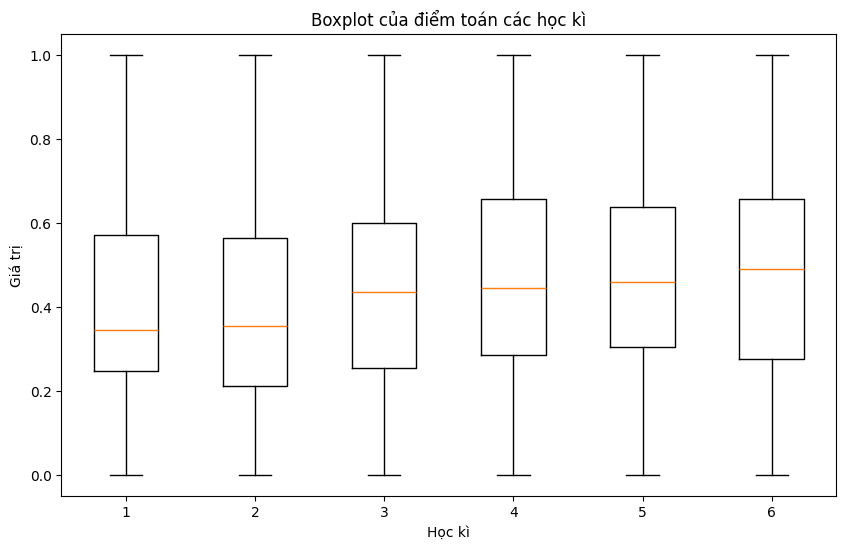

In [44]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(X_train[:, :6])
plt.title('Boxplot của điểm toán các học kì')
plt.xlabel('Học kì')
plt.ylabel('Giá trị')
plt.show()

8.	Xây dựng mô hình hồi quy tuyến tính dự báo điểm LOGIC dựa trên các yếu tố điểm toán và giới tính

In [45]:
from sklearn.linear_model import LinearRegression
# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
# Đào tạo mô hình
model.fit(X_train, y_train)

LinearRegression()

In [46]:
X_train[1]

array([1.        , 1.        , 0.53107345, 0.9248153 , 0.77846154,
       0.61585684, 0.        , 1.        ])

In [47]:
y_train.values[1] 

4.0

In [48]:
# (Hệ số tự do của biến độc lập):
print(model.intercept_)

# (Hệ số góc của biến độc lập):
print(model.coef_)

3.785716779955745
[ 0.43664132 -0.00739406 -0.7147351  -0.27820311  0.16259316  1.50580223
 -0.27458709  0.27458709]


9.	Hãy đánh giá mô hình trên tập train và test. Ví dụ: so sánh kết quả MAE trên tập train và test đưa ra nhận xét

In [49]:
# Đánh giá mô hình
import numpy as np
from sklearn import metrics

X_test = scaler.transform(X_test)
y_test_pred = model.predict(X_test)

print('Score or R-Squared: ', model.score(X_test,y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_test,y_test_pred))


Score or R-Squared:  -0.1793344515863915
Mean Absolute Error: 0.8378540634753877
Mean Squared Error: 1.0973338529995253
Root Mean Squared Error:  1.0475370413496248
Mean Absolute Percentage Error:  0.20945581494040022


In [50]:
# Đánh giá mô hình
import numpy as np
from sklearn import metrics

X_train = scaler.transform(X_train)
y_train_pred = model.predict(X_train)

print('Score or R-Squared: ', model.score(X_train,y_train))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_train,y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared:  -0.4301250071806546
Mean Absolute Error: 0.9758196315890817
Mean Squared Error: 1.6394902804486744
Root Mean Squared Error:  1.280425819971104
Mean Absolute Percentage Error:  0.2189492200418603


c:\Users\FPTSHOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


10.	Ứng dụng dự báo, với điểm toán các học kì 1,2 các năm lớp 10,11,12 và giới tính lần lượt là: 5.0, 6.5, 7.0, 7.0, 6.5, 6.0 và giới tính là nam thì điểm thi LOGIC là bao nhiêu.

In [51]:
#x=df[['T1','T2','T3','T4','T5','T6','F','M']].values # input frature dac Trung
new_data = np.array([[5.0, 6.5, 7.0, 7.0, 6.5, 6.0, 0, 1]])  # 0 là giới tính nữ, 1 là giới tính nam

new_data

array([[5. , 6.5, 7. , 7. , 6.5, 6. , 0. , 1. ]])

In [52]:
# Dự đoán điểm LOGIC
# Sử dụng model ở câu 8 để dự đoán
diem_logic_new = model.predict(new_data)

print(f'Điểm dự đoán LOGIC: {diem_logic_new[0]}')

Điểm dự đoán LOGIC: 9.336550550439757
